# Ella Serber

## Research question/interests
My primary research question asks: Is there a relationship among various personality traits?
    
Hypothesis 1: There is a significant positive relationship between Openness and Extraversion; Openness and Agreeableness; Extraversion and Agreeableness; and Conscientousness and Agreeableness. There is a significant negative relationship between Neuroticism and Extraversion, and Neuroticism and Agreeableness. 

My secondary research question asks: How do scores between men and women differ on the 5 personality traits?
    
Hypothesis 2: Based on extant research, on average, women will show higher scores than men on Extraversion, and Agreeableness, lower scores on Neuroticism, and there are will be no significant gender differences for Conscientiousness or Openness.

*Note: in the dataset, high neuroticism is at the low end of the continuum so a high score on the N factor corresponds to low neuroticism/high emotional stability

## Load packages and data 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
dat_1 = pd.read_csv("../data/raw/data.csv", sep='\t')
dat_1

## EDA
*Note: more detailed information and interpretation will be included in tasks 3 and 4*

In [ ]:
dat_1.shape
#Gives number of rows and columns

In [ ]:
dat_1.columns
#Gives all column names

In [ ]:
dat_1.head(10)
#Gives shortened dataframe for specified number of rows 

In [ ]:
dat_1.nunique(axis=0)
#Gives number of unique values for each column
#Checking to ensure E1 through O10 only have 6 unique responses (per survey format)

In [ ]:
dat_1.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))
#Descriptive stats for entire dataframe
#Clearly, something is off with the 'age' column (mean, std, and max do not make sense) -- however, this column will not be used in further analyses so this is not of concern for the current research

In [ ]:
dat_1.age.unique()
#Gives each unique value for a column (e.g., age)
#Based on previous output, I wanted to look at all the unique values of age to try and figure out why the descriptive stats look very strange

In [ ]:
print(dat_1.E1.describe())
print(dat_1.N1.describe())
#descriptive stats for one column 
#not useful now, but might be later once factor total columns are created

In [ ]:
dat_2 = dat_1.copy().drop(['engnat','hand','source', 'country', 'race', 'age'], axis=1)
#Drop unwanted columns (not going to be used)

In [ ]:
pd.isnull(dat_2).values.any()
#No missing values

In [ ]:
np.isnan(dat_2).values.any()
#No NaN values

#### Checkpoint
So far, so good. I have loaded the dataset and imported packages, done some basic exploration of the dataset, located and removed columns that are not of use for further analysis, and shown that there are no null or NaN values. Next, I will look for rows in which there are invalid data or outliers (and if so, remove them) and locate the rows where "gender" is missing or reported as "other".

In [ ]:
dat_2.loc[dat_2["E1"] == 0]
#Find "0" in column "E1" (can use for any column)
#shows one row with missing data (to be removed later)

In [ ]:
print(pd.unique(dat_2["gender"]))
#Gives unique values for "gender" column
#Need to remove gender = 0 (missing) and gender = 3 (other)

dat_2.loc[dat_2['gender'] == 0]
dat_2.loc[dat_2['gender'] == 3]
#Shows where gender is missing (0) or 'other' (3) -- only displays the latter output but can run either one indiviudally by printing or commenting the other one out
#Want to drop these rows (without entering each manually) 

#### Checkpoint
One row had missing data for the desired columns, so it was removed. 102 rows have "gender" = 3 (other) and 24 rows have "gender" = 0 (missing); these rows will be removed in a later step when subsetting the dataframe. Now I am ready to reverse score certain items and create factor total scores. 

### Reverse Scoring

In [ ]:
#Reverse Scored Items: E2, E4, E6, E8, E10, N1, N3, N5, N6, N7, N8, N9, N10, A1, A3, A5, A7, C2, C4, C6, C8, O2, O4, O6

#Create function to reverse score
def reverseScoring(df, high, cols):
    df[cols] = high - df[cols]
    return df

#call function for items that are reverse scored
dat = reverseScoring(dat_2, 6, cols=["E2", "E4", "E6", "E8", "E10", "N1", "N3", "N5", "N6", "N7", "N8", "N9", "N10", "A1", "A3", "A5", "A7", "C2", "C4", "C6", "C8", "O2", "O4", "O6"])
dat

### Factor scores

In [ ]:
dat["E_Tot"] = dat["E1"]+dat["E2"]+dat["E3"]+dat["E4"]+dat["E5"]+dat["E6"]+dat["E7"]+dat["E8"]+dat["E9"]+dat["E10"]
dat["N_Tot"] = dat["N1"]+dat["N2"]+dat["N3"]+dat["N4"]+dat["N5"]+dat["N6"]+dat["N7"]+dat["N8"]+dat["N9"]+dat["N10"]
dat["A_Tot"] = dat["A1"]+dat["A2"]+dat["A3"]+dat["A4"]+dat["A5"]+dat["A6"]+dat["A7"]+dat["A8"]+dat["A9"]+dat["A10"]
dat["C_Tot"] = dat["C1"]+dat["C2"]+dat["C3"]+dat["C4"]+dat["C5"]+dat["C6"]+dat["C7"]+dat["C8"]+dat["C9"]+dat["C10"]
dat["O_Tot"] = dat["O1"]+dat["O2"]+dat["O3"]+dat["O4"]+dat["O5"]+dat["O6"]+dat["O7"]+dat["O8"]+dat["O9"]+dat["O10"]
#Create new columns containing the total scores for each individual on each of the 5 factors 

### Create Variables for the Average of Each Factor Total Score

In [ ]:
E_Avg = sum(dat["E_Tot"])/len(dat)
A_Avg = sum(dat["A_Tot"])/len(dat)
N_Avg = sum(dat["N_Tot"])/len(dat)
C_Avg = sum(dat["C_Tot"])/len(dat)
O_Avg = sum(dat["O_Tot"])/len(dat)
#Total average (mean) for each factor

## Subsets

In [ ]:
dat_reduced_g1 = dat[["gender", "E_Tot", "N_Tot", "A_Tot", "C_Tot", "O_Tot"]]
values = [0,3]
dat_reduced_g = dat_reduced_g1[dat_reduced_g1.gender.isin(values) == False]
dat_reduced = dat[["E_Tot", "N_Tot", "A_Tot", "C_Tot", "O_Tot"]]
#Create subsests with desired columns (with and without gender) and remove rows where gender = 3 (missing) or 0 (neither male nor female)

In [ ]:
print(dat_reduced.loc[(dat_reduced==0).any(1)])
#Check that no more rows contain 0's (i.e., missing/invalid data)
#looks good (no 0's), continue analysis

In [ ]:
values = [0, 3, 1]
dat_f = dat_reduced_g[dat_reduced_g.gender.isin(values) == False]
dat_f
#Create "female" subset (only include rows where gender = 2 (female)

In [ ]:
values = [0, 3, 2]
dat_m = dat_reduced_g[dat_reduced_g.gender.isin(values) == False]
dat_m
#Create "male" subset (only include rows where gender = 1 (male)

#### Checkpoint
Great! Now I have subsetted dataframes that can be used for future analyses. Next, I will try out various visualizations to see which work best for answering my research questions. 

### Visualizations (EDA)

In [ ]:
dat_reduced_g.hist(column= "E_Tot", bins =20)
dat_reduced_g.hist(column= "N_Tot", bins =20)
dat_reduced_g.hist(column= "A_Tot", bins =20)
dat_reduced_g.hist(column= "C_Tot", bins =20)
dat_reduced_g.hist(column= "O_Tot", bins =20)

#Shows distribution of each factor for males and females (combined)

In [ ]:
dat_reduced_g.hist(column= "E_Tot", by = "gender", bins=20, sharey=True)
dat_reduced_g.hist(column= "N_Tot", by = "gender", bins=20, sharey=True)
dat_reduced_g.hist(column= "A_Tot", by = "gender", bins=20, sharey=True)
dat_reduced_g.hist(column= "C_Tot", by = "gender", bins=20, sharey=True)
dat_reduced_g.hist(column= "O_Tot", by = "gender", bins=20, sharey=True)

#Shows distribution of each factor for males and females (separately)
#Probably won't use -- difficult to interpret since many less males than females in sample

In [ ]:
dat_reduced.mean().plot.bar().set(title = "Average Factor Scores", ylabel = "Mean Average", xlabel = "Factor")
#shows mean average for each category (both genders) -- A and O have higher averages than the others
#Probably won't be used for actual analysis but interesting to see

In [ ]:
sb.countplot(x = "gender", data = dat_reduced_g).set(title = "Number of Males and Females in Sample", xlabel = "Gender (1 = male, 2 = female)", ylabel = "Number of Participants")

#Many more females than males in sample 
#Probably not usefule for further analysis, but interesting to see here and good to be aware of

In [ ]:

dat_reduced_g.groupby("gender").mean().plot.bar().set(title = "Average Factor Total Score By Gender", xlabel = "Gender (1 = male, 2 = female)", ylabel = "Mean Factor Score")
#shows mean average for each factor, separated by gender

In [ ]:
sb.pairplot(dat_reduced_g, hue = "gender")
#Not very useful (too many data points)
#also hard to interpret since there are more females than males in the sample

In [ ]:
dat_reduced_g.plot.box(by = "gender")

#Produces boxplot for each factor, separated by gender, and shows the lower, middle, and upper quartile (i.e., 25th, 50th, and
#This plot does provide some good information but it does not look very nice -- probably won't use (try to find better boxplot)

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(15, 10), sharex = True, sharey = True)
fig.suptitle('Comparison of Factor Scores by Gender')
sb.set_theme(context = "notebook", style = "whitegrid", palette="pastel", font_scale = 1.4)
sb.boxplot(ax=axes[0],x="gender", y = dat_reduced_g["E_Tot"], palette=["g", "m"],
            data=dat_reduced_g).set(title = "Extraversion", xlabel = "", ylabel = "Total Score")
sb.boxplot(ax=axes[1],x="gender", y = dat_reduced_g["N_Tot"], palette=["g", "m"],
            data=dat_reduced_g).set(title = "Neuroticism", xlabel = "", ylabel = "")
sb.boxplot(ax=axes[2],x="gender", y = dat_reduced_g["A_Tot"], palette=["g", "m"],
            data=dat_reduced_g).set(title = "Agreeableness", xlabel = "Gender (1 = male, 2 = female)", ylabel = "")
sb.boxplot(ax=axes[3],x="gender", y = dat_reduced_g["C_Tot"], palette=["g", "m"],
            data=dat_reduced_g).set(title = "Conscientiousness", xlabel = "", ylabel = "")
sb.boxplot(ax=axes[4],x="gender", y = dat_reduced_g["O_Tot"], palette=["g", "m"],
            data=dat_reduced_g).set(title = "Openness", xlabel = "", ylabel = "")


#A much better boxplot! Will likely be used later

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(15, 10),sharex=True, sharey = True)
fig.suptitle('Comparison of Factor Scores by Gender')
sb.set_theme('notebook', "whitegrid", palette = "pastel")

sb.barplot(ax=axes[0],x="gender", y = "E_Tot", palette=["g", "m"], errorbar = "sd", errwidth = .95,capsize = .20,
            data=dat_reduced_g).set(title = "Extraversion", xlabel = "", ylabel = "Mean Factor Score")
sb.barplot(ax=axes[1],x="gender", y = "N_Tot", palette=["g", "m"], errorbar = "sd", errwidth = .95,capsize = .20,
            data=dat_reduced_g).set(title = "Neuroticism", xlabel = "", ylabel = "")
sb.barplot(ax=axes[2],x="gender", y = "A_Tot", palette=["g", "m"], errorbar = "sd", errwidth = .95,capsize = .20,
            data=dat_reduced_g).set(title = "Agreeableness", xlabel = "Gender (1 = male, 2 = female)", ylabel = "")
sb.barplot(ax=axes[3],x="gender", y = "C_Tot", palette=["g", "m"], errorbar = "sd", errwidth = .95,capsize = .20,
            data=dat_reduced_g).set(title = "Conscientiousness", xlabel = "", ylabel = "")
sb.barplot(ax=axes[4],x="gender", y = "O_Tot", palette=["g", "m"], errorbar = "sd", errwidth = .95,capsize = .20,
            data=dat_reduced_g).set(title = "Openness", xlabel = "", ylabel = "")

#Bar plot showing comparison of mean factor scores, by gender.
#Want to reduce space between y axis ticks but cannot figure it out
#error bars show standard deviation, clearly they are very large and they all overlap which makes it difficult to draw conclusions simply comparing means

In [ ]:
sb.violinplot(dat_reduced_g, x="gender", y= "E_Tot", split = True)
#produces violin plot for each of males and females for one of the factor total scores (e.g., E) 
#Can use subplots if wanting to use this in further analysis (at this point, not sure if it will be useful in addition to the box and bar plots already produced)

In [ ]:
corr = dat_reduced.corr()
corr.style.background_gradient(cmap='PuRd')

#Correlation matrix of 5 factors (darker colours indicate greater magnitude of correlation)
#One option for correlation plot

,E_Tot,N_Tot,A_Tot,C_Tot,O_Tot
E_Tot,1.000000,0.262475,0.333979,0.106191,0.166116
N_Tot,0.262475,1.000000,0.111982,0.259772,0.100900
A_Tot,0.333979,0.111982,1.000000,0.175842,0.116139
C_Tot,0.106191,0.259772,0.175842,1.000000,0.086040
O_Tot,0.166116,0.100900,0.116139,0.086040,1.000000


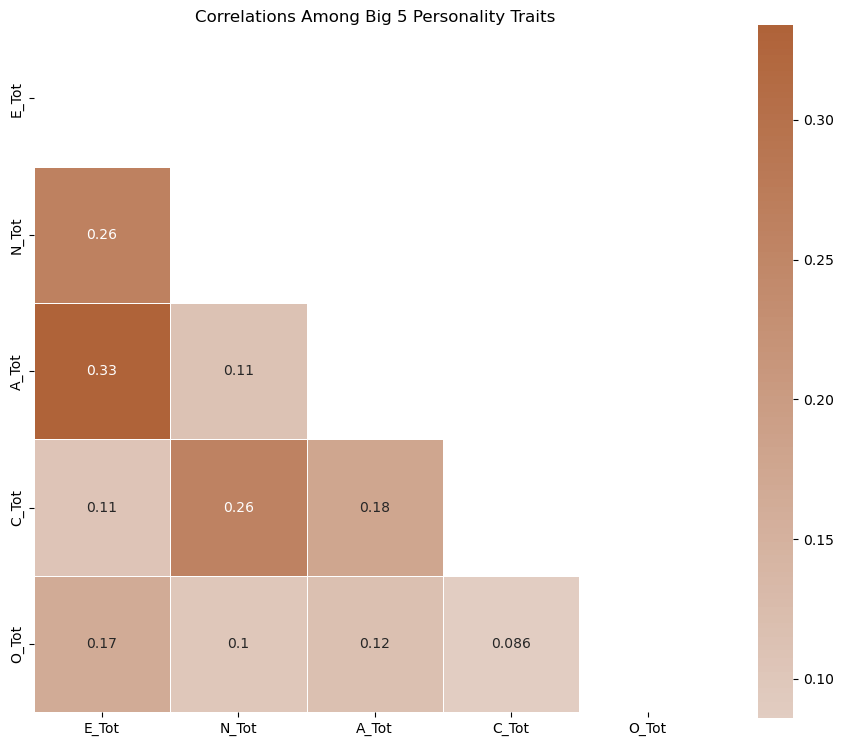

In [ ]:
#Hide upper triangle (repeating values, not necessary and makes the figure 'noisier')
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap 
cmap = sb.diverging_palette(220, 2550, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
heat_map = sb.heatmap(corr, mask=mask, cmap = cmap, annot = True, center=0,
            square=True, linewidths=.7).set(title = "Correlations Among Big 5 Personality Traits")

#Another option for correlation matrix plot -- this one looks better 

#### Checkpoint
Wow! That's a lot of visualizations... some definitley seem better suited to by current research questions but they are all interesting to look at and notice different patterns, themes, and relationships within the data. In a later section, the visualizations will be described in greater detail and in regard to the research questions -- for now, they are more to get an idea of what I will want to use later. 

This marks the end of my EDA and will now move on to the analysis pipleline. 

# Analysis Pipeline

### Import Packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb

## Load Data

In [ ]:
dat_1 = pd.read_csv("../data/raw/data.csv", sep='\t')

## Clean Data
*Dropping columns that are not used in further analyses (i.e., English as a native language, handedness, how the participant got to the questionnaire, the participants' country, the race of the participant, and the age of the participant)*

*Dropping row index 19064 since it is missing all of the questionnaire data*

In [ ]:
dat_2 = dat_1.copy().drop(['engnat','hand','source', 'country', 'race', 'age'], axis=1)
dat_3 = dat_2.copy().drop([19064], axis=0)

#### Checkpoint
By this point, the data has been loaded and the unused columns have been dropped as well as the row with missing data. Next, the data will be processed to get it to the state where analysis can be conducted. 

## Process Data


### Reverse Scoring
*Reverse scoring is used since the original questionnaire includes questions that are reverse coded -- that is, the questions are worded in a way opposite to thier relation with the construct being assessed*


In [ ]:
def reverseScoring(df, high, cols):
    df[cols] = high - df[cols]
    return df

dat = reverseScoring(dat_3, 6, cols=["E2", "E4", "E6", "E8", "E10", "N1", "N3", "N5", "N6", "N7", "N8", "N9", "N10", "A1", "A3", "A5", "A7", "C2", "C4", "C6", "C8", "O2", "O4", "O6"])
#Converts the specified column values to be reverse scored (based on reverse-worded questions) such that 1 becomes 5, 2 becomes 4, 3 stays the same, 4 becomes 2, and 5 becomes 1

### Create Factor Score Columns
*Factor Score/Total columns (i.e., the sum of a participants' score on all items pertaining to the same factor) are created in order to use in further analyses*

In [ ]:
dat["E_Tot"] = dat["E1"]+dat["E2"]+dat["E3"]+dat["E4"]+dat["E5"]+dat["E6"]+dat["E7"]+dat["E8"]+dat["E9"]+dat["E10"]
dat["N_Tot"] = dat["N1"]+dat["N2"]+dat["N3"]+dat["N4"]+dat["N5"]+dat["N6"]+dat["N7"]+dat["N8"]+dat["N9"]+dat["N10"]
dat["A_Tot"] = dat["A1"]+dat["A2"]+dat["A3"]+dat["A4"]+dat["A5"]+dat["A6"]+dat["A7"]+dat["A8"]+dat["A9"]+dat["A10"]
dat["C_Tot"] = dat["C1"]+dat["C2"]+dat["C3"]+dat["C4"]+dat["C5"]+dat["C6"]+dat["C7"]+dat["C8"]+dat["C9"]+dat["C10"]
dat["O_Tot"] = dat["O1"]+dat["O2"]+dat["O3"]+dat["O4"]+dat["O5"]+dat["O6"]+dat["O7"]+dat["O8"]+dat["O9"]+dat["O10"]

#Create new columns containing the total scores for each individual on each of the 5 factors 

## Wrangle Data

In [ ]:
## Not sure exactly what to put here -- I do not need to restructure the data or merge any new data so I will create subsets here

### Create Subsets

In [ ]:
dat_reduced_g = dat[["gender", "E_Tot", "N_Tot", "A_Tot", "C_Tot", "O_Tot"]]

dat_reduced = dat[["E_Tot", "N_Tot", "A_Tot", "C_Tot", "O_Tot"]]

#Create subsets to get dataframes with only total score columns; with and without gender

In [ ]:
values = [0, 3, 1]
dat_f = dat_reduced_g[dat_reduced_g.gender.isin(values) == False]
dat_f
#Create "female" subset (only include rows where gender = 2 (female)

In [ ]:
values = [0, 3, 2]
dat_m = dat_reduced_g[dat_reduced_g.gender.isin(values) == False]
dat_m
#Create "male" subset (only include rows where gender = 1 (male)

#### Checkpoint
Great! Now I have all of the cleaned and processed dataframes I will use for analyses. The reverse-coded items have been reverse scored, factor total scores have been created, and subsets have been created. Next, I will create method chains to make the process more concise. 

# Method Chain

## Build Method Chains

### Load packages/functions

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import project_functions2 as pf

### Method Chain 1
*Method chain to load csv file, drop unwanted columns (specified in analysis pipeline), and remove a row with missing data*

In [ ]:
dat_2 = (pd.read_csv("../data/raw/data.csv", sep='\t')
    .copy().drop(['engnat','hand','source', 'country', 'race', 'age'], axis=1)
    .copy().drop([19064], axis=0))
    
dat_2

#load csv file, drop unwanted columns, and remove a row with missing data

### Method Chain 2
*First, reverse score items that are reverse-coded. Then, assign new columns containing factor total scores by summing scores on the constituent items for each factor.*

In [ ]:
def reverseScoring(df, high, cols):
    df[cols] = high - df[cols]
    return df

dat_2 = reverseScoring(dat_2, 6, cols=["E2", "E4", "E6", "E8", "E10", "N1", "N3", "N5", "N6", "N7", "N8", "N9", "N10", "A1", "A3", "A5", "A7", "C2", "C4", "C6", "C8", "O2", "O4", "O6"])

dat_3 = (pd.DataFrame(dat_2)
        .assign(E_Tot=lambda x: dat_2["E1"]+dat_2["E2"]+dat_2["E3"]+dat_2["E4"]+dat_2["E5"]+dat_2["E6"]+dat_2["E7"]+dat_2["E8"]+dat_2["E9"]+dat_2["E10"])
        .assign(N_Tot=lambda x: dat_2["N1"]+dat_2["N2"]+dat_2["N3"]+dat_2["N4"]+dat_2["N5"]+dat_2["N6"]+dat_2["N7"]+dat_2["N8"]+dat_2["N9"]+dat_2["N10"])
        .assign(A_Tot=lambda x: dat_2["A1"]+dat_2["A2"]+dat_2["A3"]+dat_2["A4"]+dat_2["A5"]+dat_2["A6"]+dat_2["A7"]+dat_2["A8"]+dat_2["A9"]+dat_2["A10"])
        .assign(C_Tot=lambda x: dat_2["C1"]+dat_2["C2"]+dat_2["C3"]+dat_2["C4"]+dat_2["C5"]+dat_2["C6"]+dat_2["C7"]+dat_2["C8"]+dat_2["C9"]+dat_2["C10"])
        .assign(O_Tot=lambda x: dat_2["O1"]+dat_2["O2"]+dat_2["O3"]+dat_2["O4"]+dat_2["O5"]+dat_2["O6"]+dat_2["O7"]+dat_2["O8"]+dat_2["O9"]+dat_2["O10"]))

dat_3

#Reverse score items before creating total scores
#Method chain to create columns with factor total scores by summing scores on the constituent variables for each factor

#### Checkpoint
Two method chains have been created. The first one loads the data and drops unwanted columns and rows. The second one reverse scores items and creates factor total scores. Next, I will wrap the method chains into a function to make the process even more concise and efficient. 

## Wrap Method Chains in Function
*Created a new function (called 'load_and_process') by including the two method chains and saved it in a .py file. Then, import the .py file (containing the new function) and run it using a relative path to the desired dataset*

Now we can easily load, clean, and process the data in one step!

In [ ]:
import project_functions2 as pf
dat = pf.load_and_process("../data/raw/data.csv")
dat
#Reverse scoring function (reverseScoring) and method chains wrapped in a function (load_and_process) in "project_functions2.py"

,gender,E1,E2,E3,E4,E5,E6,E7,E8,E9,...,O6,O7,O8,O9,O10,E_Tot,N_Tot,A_Tot,C_Tot,O_Tot
0,1,4,4,5,4,5,5,4,3,5,...,5,4,2,5,5,44,49,46,47,43
1,2,2,4,3,3,3,3,1,1,1,...,3,3,1,3,2,22,29,35,42,26
2,2,5,5,1,2,5,5,1,1,5,...,5,5,5,5,5,35,14,38,49,45
3,2,2,1,2,2,3,2,3,2,4,...,4,5,2,5,5,22,17,37,26,41
4,2,3,5,3,3,3,5,3,5,3,...,5,3,1,5,3,34,30,44,34,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19714,2,1,2,3,1,4,3,1,4,1,...,5,4,2,5,3,21,19,42,36,35
19715,2,2,3,2,3,2,3,2,2,4,...,3,4,2,3,3,25,39,36,32,30
19716,1,2,1,4,1,5,1,1,4,1,...,5,1,5,5,5,21,10,26,23,37
19717,1,1,2,2,3,2,2,1,3,4,...,5,5,3,5,5,21,20,38,43,42


#### Checkpoint
I have successfully created a function to run my method chains, placed it in a .py file, and imported and run the function in my .ipynb file. This makes it quick and easy to load, clean, and process my data. Next, I will analyse the data in regard to my research questions.

# Analysis for RQ

### Imports

In [ ]:
#from scipy.stats import shapiro 
#from scipy.stats import lognorm
#from scipy.stats import levene
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np

## Create Subsets (total score columns with gender variations)
*Subsets are used to produce a dataframe with only select data from the original dataframe. In this case, I want to create four subsets -- one including only the factor total scores, one including factor total scores and gender, one including factor total scores for females only, and one including factor total scores for males only*

In [ ]:
#total scores without gender
#Note: recall lower N scores correspond to greater neuroticism; higher scores to greater emotional stability
dat_sub = dat[["E_Tot", "N_Tot", "A_Tot", "C_Tot", "O_Tot"]]

In [ ]:
#total scores with gender = 1 (male) and 2 (female)
values = [0,3]
dat_sub_g1 = dat[["gender","E_Tot", "N_Tot", "A_Tot", "C_Tot", "O_Tot"]]
dat_sub_g = dat_sub_g1[dat_sub_g1.gender.isin(values) == False]

In [ ]:
#Female only
values = [0, 3, 1]
dat_f = dat_sub_g1[dat_sub_g1.gender.isin(values) == False]

In [ ]:
#Male only
values = [0, 3, 2]
dat_m = dat_sub_g1[dat_sub_g1.gender.isin(values) == False]

#### Checkpoint
The data is loaded, cleaned, processed, and subsets have been created. Now I am ready to inspect the data and answer my research questions. 

## RQ 1: Relationship Among Personality Traits
H1 = There is a significant positive relationship between Openness and Extraversion; Openness and Agreeableness; Extraversion and Agreeableness; and Conscientousness and Agreeableness. There is a significant negative relationship between Neuroticism and Extraversion, and Neuroticism and Agreeableness.

*This analysis will assess whether there are relationhsips between the factor total scores (i.e., whether the specified traits, as stated in the hypothesis, are correlated with one another)* 


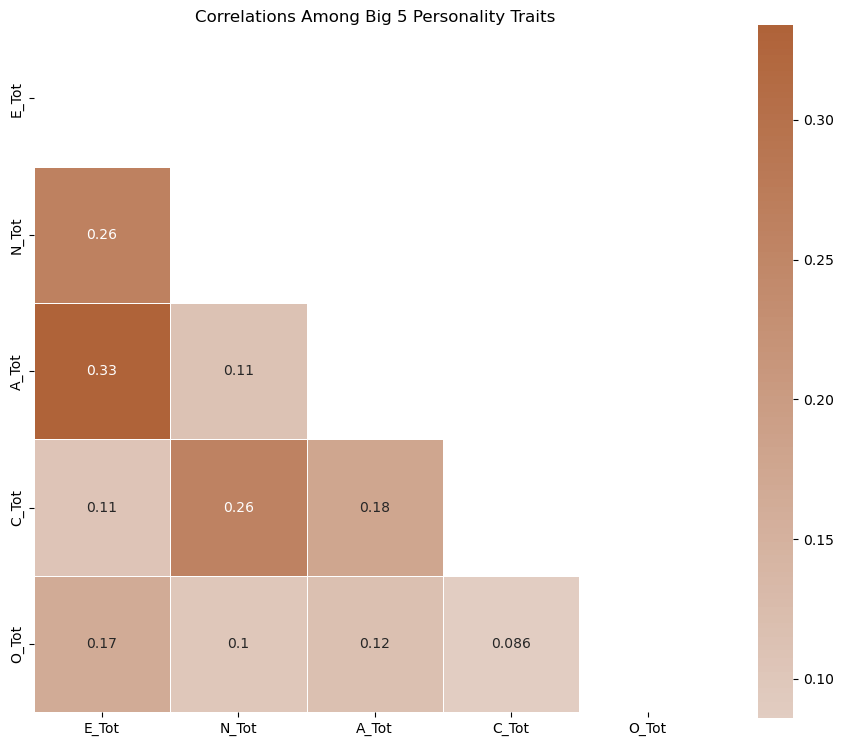

In [ ]:
corr = dat_sub.corr("pearson")

#Hide upper triangle (repeating values, not necessary and makes the figure 'noisier')
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap 
cmap = sb.diverging_palette(220, 2550, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
heat_map = sb.heatmap(corr, mask=mask, cmap = cmap, annot = True, center=0,
            square=True, linewidths=.7).set(title = "Correlations Among Big 5 Personality Traits")

### Figure 1: Correlations Among Big 5 Personality Traits
This plot shows the Pearson's correlation among the 5 factors. The darker colours represent greater magnitude of correlation (e.g., .33 is greater than .11 so it is a darker shade). 
Regarding RQ 1, this plot supports the hypothesized relationship for: Openness and Extraversion with a correlation of .17; Openness and Agreeableness with a correlation of .12; Extraversion and Agreeableness with a correlation of .33; Agreeableness and Conscientiousness with a correlation of .18; Neuroticism and Extraversion with a correlation of 

In [ ]:
sb.jointplot(data = dat_sub_g, x = "O_Tot", y = "E_Tot", kind = "reg", scatter = False)

#Regression plot with variable distributions; shows positive correlation between O and E

In [ ]:
sb.jointplot(data = dat_sub_g, x = "O_Tot", y = "A_Tot", kind = "reg", scatter = False)

#Regression plot with variable distributions; shows positive correlation between O and A

In [ ]:
sb.jointplot(data = dat_sub_g, x = "E_Tot", y = "A_Tot", kind = "reg", scatter = False)

#Regression plot with variable distributions; shows positive correlation between E and A

In [ ]:
sb.jointplot(data = dat_sub_g, x = "C_Tot", y = "A_Tot", kind = "reg", scatter = False)

#Regression plot with variable distributions; shows positive correlation between C and A

In [ ]:
sb.jointplot(data = dat_sub_g, x = "N_Tot", y = "E_Tot", kind = "reg", scatter = False)

#Regression plot with variable distributions; shows positive correlation between C and A

## RQ 2: Relationship Between Gender and Personality Traits
H2: Based on extant research, on average, women will show higher scores than men on Extraversion, and Agreeableness, lower scores on Neuroticism, and there are will be no significant gender differences for Conscientiousness or Openness.

### Descriptive Statistics

In [ ]:
dat_m.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))
#For males

In [ ]:
dat_f.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))
#For females

In [ ]:
dat_sub_g.groupby('gender').mean()

#Male higher than female - N and O
#Female higher than male - E, A, C

In [ ]:
dat_sub_g.groupby('gender').median()

#Male higher than female - N and O
#Female higher than male - E, A, C

In [ ]:
print(dat_sub_g.groupby("gender")['E_Tot'].describe())
print(dat_sub_g.groupby("gender")['N_Tot'].describe())
print(dat_sub_g.groupby("gender")['A_Tot'].describe())
print(dat_sub_g.groupby("gender")['C_Tot'].describe())
print(dat_sub_g.groupby("gender")['O_Tot'].describe())

#Produces descriptive stats for each factor, separated by gender
#not sure if this is useful since the previous code (above) gives mean/median by gender and I don't need all the extra stats

In [ ]:
print(shapiro(dat_sub["E_Tot"]))
print(shapiro(dat_sub["N_Tot"]))
print(shapiro(dat_sub["A_Tot"]))
print(shapiro(dat_sub["C_Tot"]))
print(shapiro(dat_sub["O_Tot"]))

#none are normally distributed (but sample size is very large)

In [ ]:
print(levene(dat_m["E_Tot"], dat_f["E_Tot"]))
print(levene(dat_m["N_Tot"], dat_f["N_Tot"]))
print(levene(dat_m["A_Tot"], dat_f["A_Tot"]))
print(levene(dat_m["C_Tot"], dat_f["C_Tot"]))
print(levene(dat_m["O_Tot"], dat_f["O_Tot"]))

#N, A, C, and O are sig. (i.e., unequal variance across samples)
#E is NS (i.e., equal variance across samples)

In [ ]:
ttest_e = print(scipy.stats.ttest_ind(dat_m["E_Tot"], dat_f["E_Tot"], equal_var=True))
ttest_n = print(scipy.stats.ttest_ind(dat_m["N_Tot"], dat_f["N_Tot"], equal_var=False))
ttest_a = print(scipy.stats.ttest_ind(dat_m["A_Tot"], dat_f["A_Tot"], equal_var=False))
ttest_c = print(scipy.stats.ttest_ind(dat_m["C_Tot"], dat_f["C_Tot"], equal_var=False))
ttest_o = print(scipy.stats.ttest_ind(dat_m["O_Tot"], dat_f["O_Tot"], equal_var=False))

#Can use t-test based on Central Limit Theorem (data with sufficient sample size to overcome non-normal distribution)
#All values sig. (p < .05) --> there is significant difference in means for all factors
    #I feel like this is wrong, there doesn't seem to be that large of a difference between means for some factors (e.g., C)
    scipy.stats.ttest_ind

### Visualizations

In [ ]:
dat_sub_g.hist(column= "E_Tot", bins =20)
dat_sub_g.hist(column= "N_Tot", bins =20)
dat_sub_g.hist(column= "A_Tot", bins =20)
dat_sub_g.hist(column= "C_Tot", bins =20)
dat_sub_g.hist(column= "O_Tot", bins =20)

#Shows distribution of each factor for males and females (combined)

In [ ]:
dat_sub_g.hist(column= "E_Tot", by = "gender", bins=20)
dat_sub_g.hist(column= "N_Tot", by = "gender", bins=20)
dat_sub_g.hist(column= "A_Tot", by = "gender", bins=20)
dat_sub_g.hist(column= "C_Tot", by = "gender", bins=20)
dat_sub_g.hist(column= "O_Tot", by = "gender", bins=20)

#Shows distribution of each factor for males and females (separately)

In [ ]:
dat_sub_g.groupby("gender").mean().plot.bar(grid=True, width =.5, alpha = .90)

#Shows mean score on each factor separated by gender 
#Males higher on O and N
#Females higher on E, A, C
#Note: similar pattern except males higher on N than E and females higher on E than N; males higher on O than A and females higher on A than O 

In [ ]:
sb.boxplot(x = "gender", y = "E_Tot", data = dat_sub_g)
#Boxplot showing scores on factor E separated by gender and shows the lower, middle, and upper quartile (i.e., 25th, 50th, and 75th percentile, respectively) as well as any outliers (if detected)
#Females higher than males

In [ ]:
sb.boxplot(x = "gender", y = "N_Tot", data = dat_sub_g)
#Boxplot showing scores on factor N separated by gender and shows the lower, middle, and upper quartile (i.e., 25th, 50th, and 75th percentile, respectively) as well as any outliers (if detected)
#Males higher than females

In [ ]:
sb.boxplot(x = "gender", y = "A_Tot", data = dat_sub_g)
#Boxplot showing scores on factor A separated by gender and shows the lower, middle, and upper quartile (i.e., 25th, 50th, and 75th percentile, respectively) as well as any outliers (if detected)
#Females higher than males; shows outliers below bottom whisker (less than -1.5 x the interquartile range), negatively skewed data

In [ ]:
sb.boxplot(x = "gender", y = "C_Tot", data = dat_sub_g)
#Boxplot showing scores on factor C separated by gender and shows the lower, middle, and upper quartile (i.e., 25th, 50th, and 75th percentile, respectively) as well as any outliers (if detected)
#Females higher than males (although very close); few outliers on bottom, slight negatively skewed data

In [ ]:
sb.boxplot(x = "gender", y = "O_Tot", data = dat_sub_g)
#Boxplot showing scores on factor O separated by gender and shows the lower, middle, and upper quartile (i.e., 25th, 50th, and 75th percentile, respectively) as well as any outliers (if detected)    
#Males higher than females; shows outliers below bottom whisker (less than -1.5 x the interquartile range), negatively skewed data 

In [ ]:
sb.violinplot(data = dat_sub_g, x = "gender", y = "E_Tot")
#Violin plot showing density of scores on factor E, separated by gender -- width corresponds frequency (i.e., widest part corresponds to the most frequent score)

In [ ]:
sb.violinplot(data = dat_sub_g, x = "gender", y = "N_Tot")
#Violin plot showing density of scores on factor N, separated by gender -- width corresponds frequency (i.e., widest part corresponds to the most frequent score)

In [ ]:
sb.violinplot(data = dat_sub_g, x = "gender", y = "A_Tot")
#Violin plot showing density of scores on factor A, separated by gender -- width corresponds frequency (i.e., widest part corresponds to the most frequent score)

In [ ]:
sb.violinplot(data = dat_sub_g, x = "gender", y = "C_Tot")
#Violin plot showing density of scores on factor C, separated by gender -- width corresponds frequency (i.e., widest part corresponds to the most frequent score)

In [ ]:
sb.violinplot(data = dat_sub_g, x = "gender", y = "O_Tot")
#Violin plot showing density of scores on factor O, separated by gender -- width corresponds frequency (i.e., widest part corresponds to the most frequent score)

In [ ]:
sb.stripplot(x = "gender", y = "E_Tot", data = dat_sub_g, jitter = True)

In [ ]:
grid = sb.PairGrid(dat_sub_g, hue = "gender")
grid.map_diag(plt.hist, alpha = .3)
grid.map_upper(plt.scatter, alpha = .2)
grid.map_lower(sb.kdeplot)
#Not useful, comparing factors with each other instead of gender

In [ ]:
sb.lmplot(data = dat_sub_g, x = "E_Tot", y = "N_Tot", hue = "gender", palette = "Set2", scatter = False)
print(sb.lmplot(data = dat_sub_g, x = "E_Tot", y = "N_Tot", scatter = False))

In [ ]:
sb.lmplot(data = dat_sub_g, x = "E_Tot", y = "A_Tot", hue = "gender", palette = "Set2", scatter = False)
print(sb.lmplot(data = dat_sub_g, x = "E_Tot", y = "A_Tot", scatter = False))

In [ ]:
sb.lmplot(data = dat_sub_g, x = "E_Tot", y = "C_Tot", hue = "gender", palette = "Set2", scatter = False)
print(sb.lmplot(data = dat_sub_g, x = "E_Tot", y = "C_Tot", scatter = False))

In [ ]:
sb.lmplot(data = dat_sub_g, x = "E_Tot", y = "O_Tot", hue = "gender", palette = "Set2", scatter = False)
print(sb.lmplot(data = dat_sub_g, x = "E_Tot", y = "O_Tot", scatter = False))

In [ ]:
print(sb.lmplot(data = dat_sub_g, x = "N_Tot", y = "A_Tot", hue = "gender", palette = "Set2", scatter = False))
print(sb.lmplot(data = dat_sub_g, x = "N_Tot", y = "A_Tot", scatter = False))

In [ ]:
print(sb.lmplot(data = dat_sub_g, x = "N_Tot", y = "C_Tot", hue = "gender", palette = "Set2", scatter = False))
print(sb.lmplot(data = dat_sub_g, x = "N_Tot", y = "C_Tot", scatter = False))

In [ ]:
print(sb.lmplot(data = dat_sub_g, x = "N_Tot", y = "O_Tot", hue = "gender", palette = "Set2", scatter = False))
print(sb.lmplot(data = dat_sub_g, x = "N_Tot", y = "O_Tot", scatter = False))

In [ ]:
print(sb.lmplot(data = dat_sub_g, x = "A_Tot", y = "C_Tot", hue = "gender", palette = "Set2", scatter = False))
print(sb.lmplot(data = dat_sub_g, x = "A_Tot", y = "C_Tot", scatter = False))

In [ ]:
print(sb.lmplot(data = dat_sub_g, x = "A_Tot", y = "O_Tot", hue = "gender", palette = "Set2", scatter = False))
print(sb.lmplot(data = dat_sub_g, x = "A_Tot", y = "O_Tot", scatter = False))

In [ ]:
print(sb.lmplot(data = dat_sub_g, x = "C_Tot", y = "O_Tot", hue = "gender", palette = "Set2", scatter = False))
print(sb.lmplot(data = dat_sub_g, x = "C_Tot", y = "O_Tot", scatter = False))

In [ ]:
sb.countplot(dat_sub_g, x = "E_Tot")